# TS: a time-series object optimized for crypto

The object `surfingcrypto.ts.TS` is specifically designed for cryptocurrencies price data.

To initiate the object, first load the package configuration.

In [101]:
from surfingcrypto import Config,TS
parent="/Users/giorgiocaizzi/Documents/GitHub/surfingcrypto/"
c=Config(parent+"config")

Itiate a `TS` object by passing the `Config` object and specify the `coin` code string.

The data must be available locally in the path loaded as `Config.data_folder` attribute. If required, data can be first scraped with the `surfingcrypto.scraper.Scraper` object.

In [102]:
ts=TS(c,coin="BTC")

In [103]:
ts.ta_indicators()
ts.df.head()

,Open,High,Low,Close,Volume,Market Cap,SMA_26,SMA_12,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0,RSI_14
Date,,,,,,,,,,,,,,,,,
2017-10-01 00:00:00+00:00,3675.118358,3729.454806,3614.807026,3729.454806,1.023213e+09,6.190284e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-02 00:00:00+00:00,3722.738871,3810.612889,3727.718608,3758.690499,1.220467e+09,6.239506e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-03 00:00:00+00:00,3757.957515,3785.524139,3623.045629,3675.702350,1.096561e+09,6.102594e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-04 00:00:00+00:00,3677.311525,3701.573447,3579.984629,3597.924171,9.500383e+08,5.974056e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-05 00:00:00+00:00,3598.366553,3727.477902,3536.648382,3695.389871,9.918637e+08,6.136453e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The time series are UTC aware.

In [104]:
ts.df.index[-1]

Timestamp('2022-02-19 00:00:00+0000', tz='UTC')

The distance from the all time high (ATH) can be computed.

In [105]:
ts.distance_from_ath()
ts.df["distance_ATH"].tail()

Date
2022-02-15 00:00:00+00:00    19049.128692
2022-02-16 00:00:00+00:00    19650.255564
2022-02-17 00:00:00+00:00    22631.101536
2022-02-18 00:00:00+00:00    22948.400646
2022-02-19 00:00:00+00:00    22867.868289
Name: distance_ATH, dtype: float64

In [106]:
import matplotlib
from matplotlib.colors import LinearSegmentedColormap,Normalize
cmap = LinearSegmentedColormap.from_list('colorbar', ['green',"orange","red",'purple'])

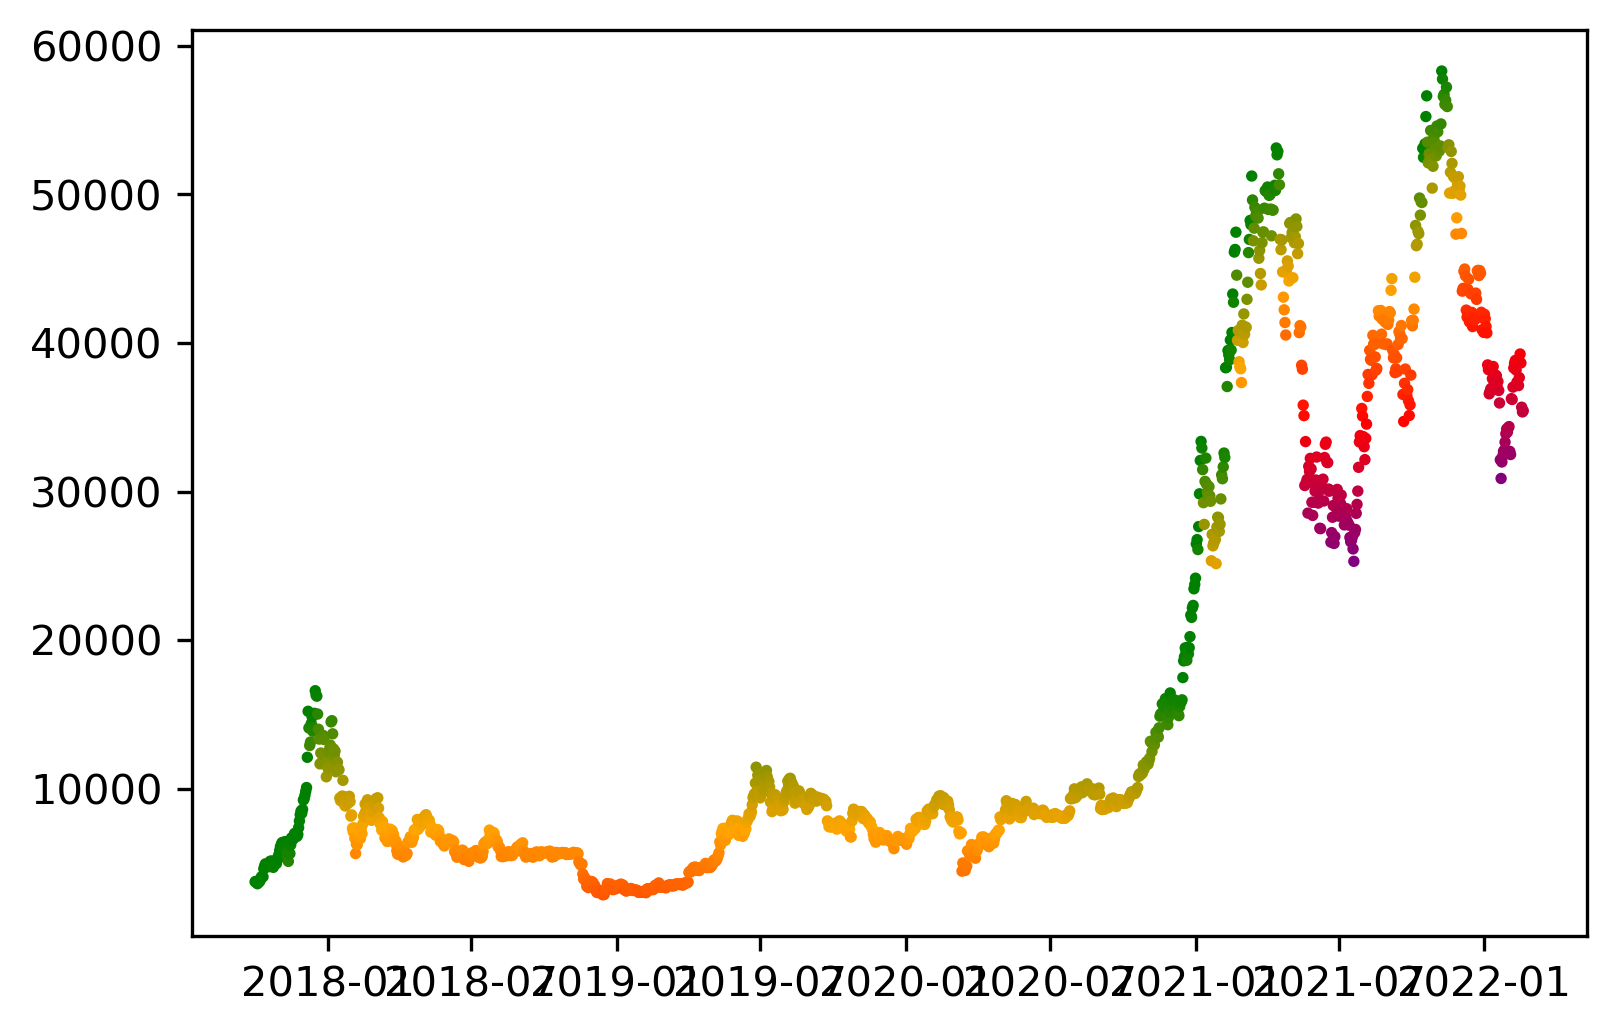

In [108]:
f,ax=matplotlib.pyplot.subplots(dpi=300)
import numpy as np
prova=ts.df.loc[:]
norm=Normalize(vmin=prova['distance_ATH'].min(),vmax=prova['distance_ATH'].max())
colors = [matplotlib.colors.rgb2hex(x) for x in cmap(norm(prova['distance_ATH']))]
ax.scatter(prova.index,prova.Close,c=colors,s=3)